# Assignment 2: $k$ Nearest Neighbor

## Do any four.

In [39]:
# import libaries :P
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

### **Q1.** Please answer the following questions.
#### 1. What is the difference between regression and classification?

Put most simply, when we are looking for a categorical target/outcome, then we are doing classification, and when we are looking for a numerical target/outcome, we are doing regression. For example, a classification issue would be 'given variables $X$, what is the probability we would assign to each possible label $l$ for the variable $y$', whereas a regression issue would be 'given the available data, what is the most likely output $y$ given the input $x$?'
   
#### 2. What is a confusion table/matrix? What does it help us understand about a model's performance?

A confusion matrix describes the relationship between actual values and predicted values. It helps us understand how good our models are at correctly predicting values - it shows the number of values that are true positives/negatives and false positives/negatives.

#### 3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifier's predictive performance?

Accuracy for kNN classification is the proportion of cases that were predicted correctly (as in, the sum of the values that are true positives in the confusion matrix over the total number of observations). This might not be entirely sufficient to evaluate a classifier's predictive performance because it doesn't account for imbalanced data or differences between false positives/negatives.

#### 4. What does the root mean squared error quantify about a particular model?

The RMSE calculates the distance from true values to the ones predicted by a model (weighted by sample size), which is meant to quantify how good a regression model is at giving accurate predictions (as in, it is to kNN regression and accuracy is to kNN classification)

#### 6. What are overfitting and underfitting?

Overfitting occurs when a model fits too well with training data (e.g., very small $k$ in kNN classification, high variance in a regression model), losing its generalizability (as in, performs well on training data but not on test data). Underfitting occurs when a model doesn't pick up on patterns in the data (e.g., very large $k$ in kNN classification, low/no variance in a regression model, or performing poorly on both training and test data.

#### 7. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?

Doing train/test splits helps ensure that as we improve model accuracy, the model isn't overfitting to the training data. If the model performs well on training data but poorly on test data, we know it is overfitting and can go back to adjust the model so it performs well on both training and test data. This improves model performance because we are ensuring that our model is generalizable instead of being exactly fit to training data.

Accuracy and RMSE describe how well a model reflects training data (as in, a higher accuracy or a lower RMSE will correspond to models that better reflect training data). When we choose $k$ based off of these values, we are trying to choose a value that prevents underfitting by reducing the RMSE or maximizing the accuracy - and then we balance this with train/test splitting to prevent overfitting. this improves model performance because we are making sure that our model points out generalizable trends.

#### 9. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

Hard classification (reporting class label as a prediction) returns the most common label among the nearest neighbor labels, and soft classificaiton (reporting probability distribution over class labels) returns the proportions for which each of the labels occur among the nearest neighbors. Hard classification is useful in scenarios where there needs to be a binary decision made, but this runs the risk of misclassifying data based on the majority of points in its cluster. Soft classification doesn't give a direct class, but outputting a distribution allows the user to choose based on these probabilities (which can be better for higher-risk situations like diagnosing a medical condition).


### **Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

#### 1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).

In [40]:
mines = pd.read_csv('./data/land_mines.csv')
mines.head()

,voltage,height,soil,mine_type
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


In [41]:
mines.shape

(338, 4)

In [42]:
mines['mine_type'].value_counts() #summarizing target label - it is a categorical variable so we summarize it using value_counts

1    71
2    70
3    66
4    66
5    65
Name: mine_type, dtype: int64

In [43]:
mines[['voltage','height','soil']].describe() # summarizing features

,voltage,height,soil
count,338.000000,338.000000,338.000000
mean,0.430634,0.508876,0.503550
std,0.195819,0.306043,0.344244
min,0.197734,0.000000,0.000000
25%,0.309737,0.272727,0.200000
50%,0.359516,0.545455,0.600000
75%,0.482628,0.727273,0.800000
max,0.999999,1.000000,1.000000


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


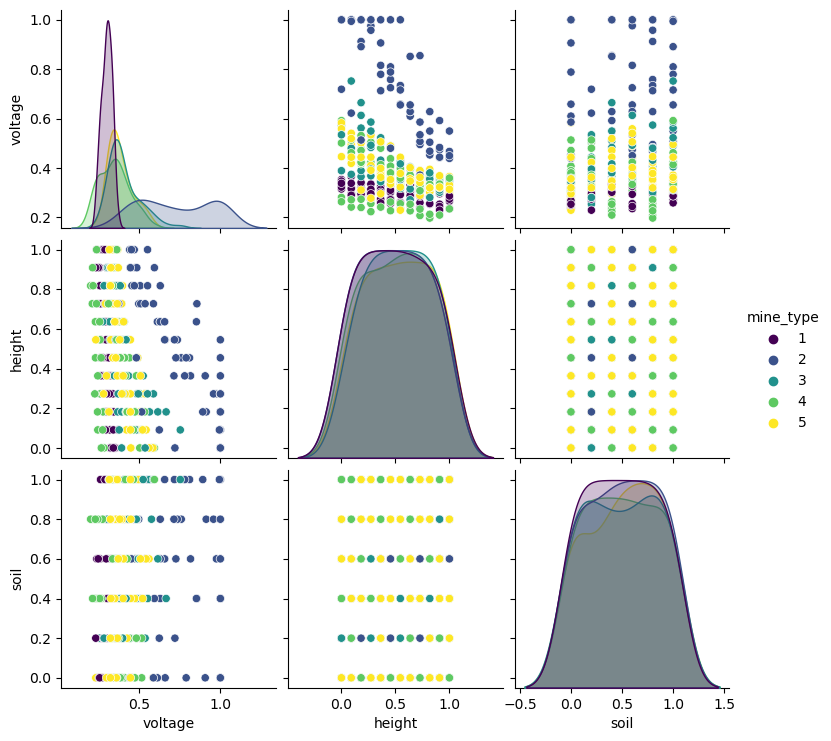

In [44]:
sns.pairplot(mines, vars=['voltage','height','soil'], hue='mine_type', palette='viridis')
plt.show()

#### 2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(mines[['voltage','height','soil']],mines['mine_type'], # Feature and target variables
                                                    test_size=.5, # Split the sample 50 train/ 50 test
                                                    random_state=757) # For replication purposes

#### 3. Build a $k$-NN classifier. Explain how you select $k$.

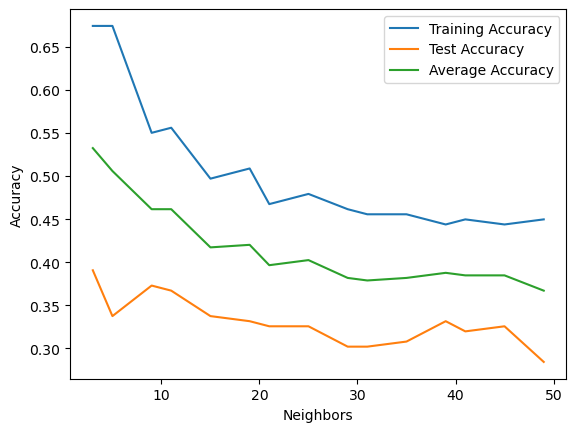

In [46]:
from sklearn.neighbors import KNeighborsClassifier

k_list = [3,5,9,11,15,19,21,25,29,31,35,39,41,45,49]
    # we want the number of neighbors to be odd in case of situations where there needs to be tiebreakers
    # and we want k to be high enough to reflect how many clusters we want to have

test_accuracy = []
train_accuracy = []

for k in k_list:
    model = KNeighborsClassifier(n_neighbors = k) 
    model = model.fit(x_train,y_train) 
    y_hat = model.predict(x_test) 
    test_acc = model.score(x_test,y_test) 
    train_acc = model.score(x_train,y_train) 
    test_accuracy.append(test_acc) 
    train_accuracy.append(train_acc)

avg_accuracy = (np.array(test_accuracy) + np.array(train_accuracy))/2

sns.lineplot(x=k_list,y=train_accuracy,label='Training Accuracy')
sns.lineplot(x=k_list,y=test_accuracy,label='Test Accuracy')
sns.lineplot(x=k_list,y=avg_accuracy,label='Average Accuracy') 

plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.show()

Based on this visualization, the $k$ value with the greatest accuracy for training data, test data, and their average is $3$. So, we should choose $k=3$.

#### 4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?

In [47]:
# storing relevant variables as u and y
x = mines[['voltage','height','soil']]
y = mines['mine_type']

# updating model/y_hat variables to only store the model for k=3
model = KNeighborsClassifier(n_neighbors = 3) 
model = model.fit(x,y) 
y_hat = model.predict(x) 
print("Accuracy:", model.score(x,y)) 

# confusion table
pd.crosstab(y,y_hat)

Accuracy: 0.6420118343195266


col_0,1,2,3,4,5
mine_type,,,,,
1,71,0,0,0,0
2,0,67,0,3,0
3,25,2,37,0,2
4,12,8,16,26,4
5,26,1,20,2,16


The model's accuracy is about 64%.

The model is very good at correctly categorizing `mine_type` when the actual type is 1 or 2; there are very few miscategorizations for these actual values. However, for types 3,4 and 5, the model is less good at correctly predicting them. For 5 in particular, there are more miscategorizations than correct categorizations. 

#### 5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

Given that this model tends to be worse at accurately categorizing mine types 3, 4, and 5 while generally performing well at accurately categorizing mine types 1 and 2, I would recommend that people use this model to differentiate between mine types 1 and 2. Given that most (and for mine type 1, all) observations where the actual mine type is 1 or 2 were accurately categorized as being 1 or 2, the model is good at identifying these mines. However, the model kind-of falls apart for the other mine types and can misidentify other mine types as being 1 or 2. So, the best use case for this model would probably be to use it to decide between mine types 1 and 2 when we know that those are the only mine types that could be there.

### **Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

#### 1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.

In [48]:
df = pd.read_csv('./data/USA_cars_datasets.csv')
cars = df[['price','year','mileage']]
cars.head()

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [49]:
cars.isna().sum() # surprisingly, there don't seem to be any NAs to handle!

price      0
year       0
mileage    0
dtype: int64

In [50]:
cars.shape

(2499, 3)

There are 2499 observations and and 3 features.

#### 2. Maxmin normalize `year` and `mileage`

In [51]:
def MinMaxScaler(x): # i elected to use this instead of the one built into sklearn because it wasn't returning the scaled value correctly
    u = (x-min(x))/(max(x)-min(x))
    return u

cars_normalized = cars.copy()
cars_normalized[['year','mileage']] = cars_normalized[['year','mileage']].apply(MinMaxScaler)
cars_normalized.head()

,price,year,mileage
0,6300,0.744681,0.269287
1,2899,0.808511,0.187194
2,5350,0.957447,0.038892
3,25000,0.872340,0.063016
4,27700,0.957447,0.006537


#### 3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.

In [52]:
# to make this easier later, I'm defining the year/mileage predictor as x and price as y
X = cars_normalized[['year','mileage']]
Y = cars_normalized['price']

# train/test split code is based on the code from the slides on kNN classfication algorithms
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=757) # For replication purposes

#### 4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?

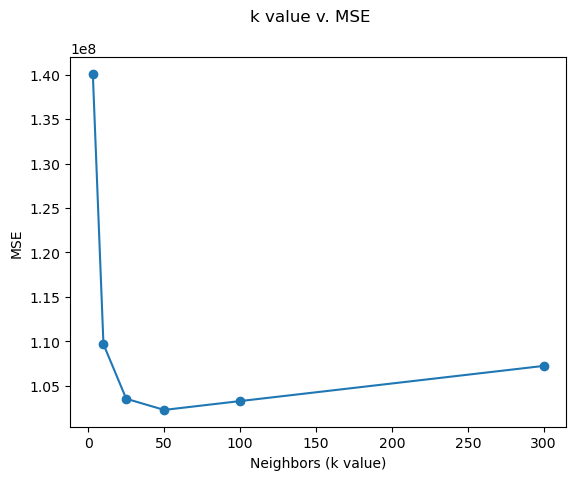

In [53]:
k_range = [3,10,25,50,100,300]

MSE = []

def mse_formula(y_test,y_hat):
    mse = np.sum( (y_test - y_hat) ** 2 )/len(y_test)
    return mse

for k in k_range:
    model = KNeighborsRegressor(n_neighbors = k) 
    model = model.fit(x_train,y_train)
    y_hat = model.predict(x_test)
    MSE.append(mse_formula(y_test, y_hat))

plt.plot(k_range, MSE, marker='o')
plt.xlabel('Neighbors (k value)')
plt.ylabel('MSE')
plt.suptitle('k value v. MSE')
plt.show()

#### 5. Determine the optimal $k$ for these data.

Of the $k$ values that we tested, the one with the lowest MSE was $k$=50.

#### 6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

When $k$ is very small, that means the model tends to overfit to training data, leading to perform poorly on test data. We can see this in our MSE graph from q.4, where the highest MSE is when $k$ is the smallest. This means that the difference between the predicted value (`y_hat`) and the actual value (`y_test`) was the greatest at the point (since the model wasn't robust enough and adapted to noise in the training data instead of general trends). 

After that, as $k$ increased, the MSE was generally much lower. However, after $k=50$, as $k$ increased, the MSE began to increase again. This is because the model began to use too many of the neighbors to predict values, leading to some more local patterns being ignored, causing underfitting (and, again, a larger difference between actual and predicted value).

This reflects general trends of very small $k$ values causing overfitting and very large $k$ values causing overfitting.

### **Q4.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

#### 1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.

In [54]:
heart = pd.read_csv('./data/heart_failure_clinical_records_dataset.csv')

heart = heart.drop(labels=['time'], axis=1)
heart.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
DEATH_EVENT                 0
dtype: int64

*(There are no NAs to handle)*

#### 2. Make a correlation matrix. What variables are strongly associated with a death event?

In [56]:
heart.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


`age` and `serum_creatinine` have a higher correlation with `DEATH_EVENT`, with both having a 0.25 to 0.29 correlation. There is also a negative correlation between `serum_sodium` and `DEATH_EVENT`.

#### 3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?

In [57]:
heart.groupby('anaemia')['DEATH_EVENT'].describe()

,count,mean,std,min,25%,50%,75%,max
anaemia,,,,,,,,
0,170.0,0.294118,0.456991,0.0,0.0,0.0,1.0,1.0
1,129.0,0.356589,0.480859,0.0,0.0,0.0,1.0,1.0


In [58]:
heart.groupby('diabetes')['DEATH_EVENT'].describe()

,count,mean,std,min,25%,50%,75%,max
diabetes,,,,,,,,
0,174.0,0.321839,0.468530,0.0,0.0,0.0,1.0,1.0
1,125.0,0.320000,0.468353,0.0,0.0,0.0,1.0,1.0


In [59]:
heart.groupby('high_blood_pressure')['DEATH_EVENT'].describe()

,count,mean,std,min,25%,50%,75%,max
high_blood_pressure,,,,,,,,
0,194.0,0.293814,0.456687,0.0,0.0,0.0,1.0,1.0
1,105.0,0.371429,0.485504,0.0,0.0,0.0,1.0,1.0


In [60]:
heart.groupby('sex')['DEATH_EVENT'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
0,105.0,0.323810,0.470173,0.0,0.0,0.0,1.0,1.0
1,194.0,0.319588,0.467523,0.0,0.0,0.0,1.0,1.0


In [61]:
heart.groupby('smoking')['DEATH_EVENT'].describe()

,count,mean,std,min,25%,50%,75%,max
smoking,,,,,,,,
0,203.0,0.325123,0.469579,0.0,0.0,0.0,1.0,1.0
1,96.0,0.312500,0.465946,0.0,0.0,0.0,1.0,1.0


The variables where a value of 1 is more likely to correspond with `DEATH_EVENT` are: `anaemia` and `high_blood_pressure`.

#### 4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.

In [62]:
X = np.array(heart[['age','anaemia','high_blood_pressure','serum_creatinine']])
    # we choose these variables based on which ones showed a correlation on the correlation matrix 
    # and which ones demonstrated having a higher proportion of the population die when their value was "true"
y = heart['DEATH_EVENT']

#### 5. Maxmin normalize all of the variables in `X`.

In [63]:
X = [MinMaxScaler(i) for i in X]

#### 6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).

In [64]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=757) # For replication purposes

#### 7. Determine the optimal number of neighbors for a $k$-NN classification or regression for the variables you selected.

If we're trying to use $k$NN to predict `DEATH_EVENT`, we will want to use classification because `DEATH_EVENT` is a category (dead/not dead).

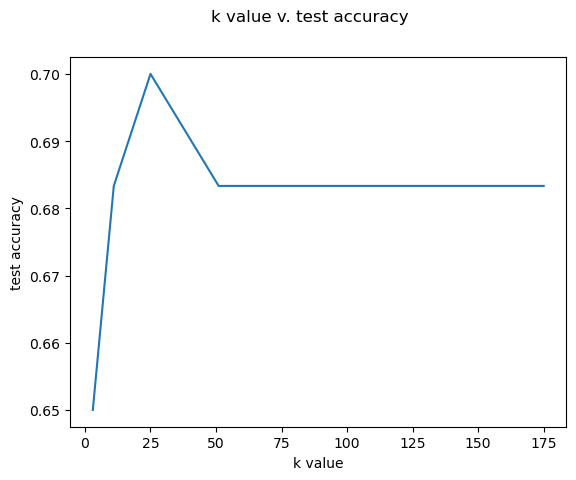

In [65]:
k_range = [3,11,25,51,75,101,125,151,175] 

test_accuracy = []
           
for k in k_range:
    model = KNeighborsClassifier(n_neighbors = k) 
    model = model.fit(x_train,y_train) 
    y_hat = model.predict(x_test)
    test_acc = model.score(x_test,y_test)
    test_accuracy.append(test_acc)

sns.lineplot(x=k_range,y=test_accuracy)
plt.xlabel('k value')
plt.ylabel('test accuracy')
plt.suptitle('k value v. test accuracy')
plt.show()

Choosing to look at test accuracy (instead of test and training accuracy), the k value with the highest accuracy for the variables we selected is $k=25$.

Because the next question looks at MSE (which is associated with regression), we will also look at the $k$NN regression.

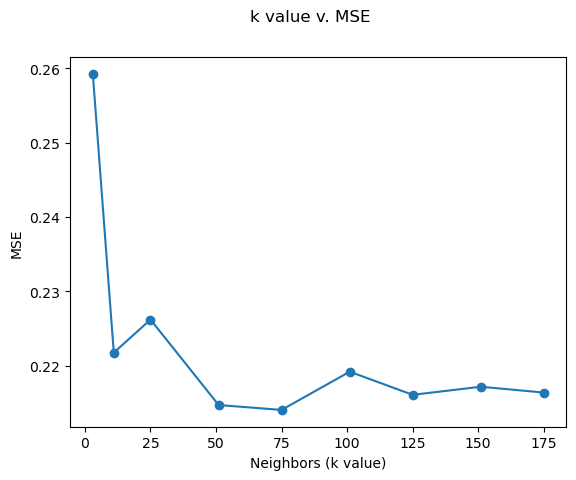

In [66]:
MSE = []

for k in k_range:
    model = KNeighborsRegressor(n_neighbors = k) 
    model = model.fit(x_train,y_train)
    y_hat = model.predict(x_test)
    MSE.append(mse_formula(y_test, y_hat))

plt.plot(k_range, MSE, marker='o')
plt.xlabel('Neighbors (k value)')
plt.ylabel('MSE')
plt.suptitle('k value v. MSE')
plt.show()

Looking at the MSE, it generally decreases as k increases, but $k=75$ has the lowest MSE. Despite $k=25$ performing well for classification, the MSE actually increases on it. So, given this data, we would choose $k=75$ as the optimal k value.

#### 8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has the best Mean Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the RMSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

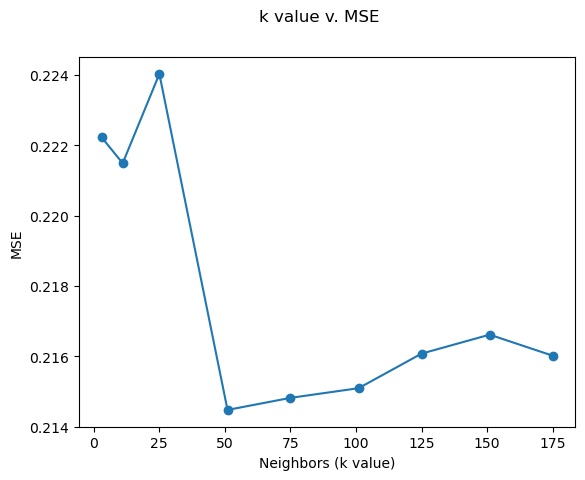

In [67]:
# step 5
X = np.array(heart[['age','anaemia','creatinine_phosphokinase','diabetes',
       'ejection_fraction','high_blood_pressure','platelets',
       'serum_creatinine','serum_sodium','sex','smoking']]) 
        # change X so that it is an array of all variables 
y = heart['DEATH_EVENT']

X = [MinMaxScaler(i) for i in X] # maxmin all variables 

#step 6
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=757) # For replication purposes
# step 7

MSE_2 = [] # reset MSE list

for k in k_range: # run regression again (for same k values as before)
    model = KNeighborsRegressor(n_neighbors = k) 
    model = model.fit(x_train,y_train)
    y_hat = model.predict(x_test)
    MSE_2.append(mse_formula(y_test, y_hat))

plt.plot(k_range, MSE_2, marker='o')
plt.xlabel('Neighbors (k value)')
plt.ylabel('MSE')
plt.suptitle('k value v. MSE')
plt.show()

The model with the lowest overall MSE was the $k$NN regression using all features where $k=50$. So, if we want to choose the best model for predicting `DEATH_EVENT`, we would most likely want to use that one. This might have also been impacted by the value of `random_state` when doing the train-test split and the values in `k_range` that I decided on, but this most likely still  best reflects the data.

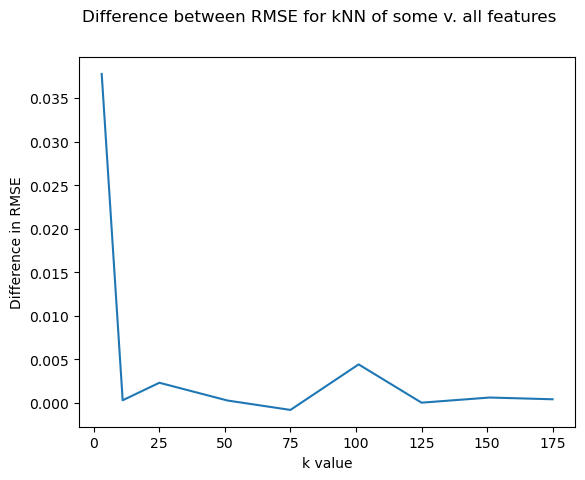

In [69]:
RMSE_1 = np.sqrt(MSE)
RMSE_2 = np.sqrt(MSE_2)
DIFF = RMSE_1 - RMSE_2

sns.lineplot(x=k_range,y=DIFF)
plt.xlabel('k value')
plt.ylabel('Difference in RMSE')
plt.suptitle('Difference between RMSE for kNN of some v. all features')
plt.show()


When looking at RMSE, the difference between some v. all variables was always very small (as in, less than 0.05), but the RMSE when looking at some variabels was always higher than when looking at all variables. The k-value where there is the greatest difference is $k=3$, and the RMSE sharply drops from there. There is also a spike at $k=100$. 

For this dataset, this most likely indicates that looking at all variables may be more helpful when trying to predict the target variable. In general, however, this does not necessarily indicate that more variables correlate with better models - it may just be the case that because we are looking at health data (and because the body is a system where each variable/feature may interact with other features in ways that aren't always immediately visible), looking at more variables makes our model better at predicting outcomes.